In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Analyzing Government Spending Data
## Introduction

For this data project, our group plans on analyzing what factors control and influence government contract prices in the United States from 12/01/20 to 03/19/2021. Our dataset is from USAspending, the official open data source of federal spending information, and includes all government contract award spending. This data is managed by the Office of the Chief Data Officer at the Bureau of the Fiscal Service, U.S. Department of the Treasury. To provide a brief background, this data is the result of the Federal Funding Accountability and Transparency Act of 2006 (FFATA), Government Funding Transparency Act, and Digital Accountability and Transparency Act (DATA Act) with the purpose to give the American public access to information on how their tax dollars are being spent. Each record of the dataset represents a government procurement transaction and detailed information about the contract, such as price (“total_dollars_obligated”), awarding agency (“awarding_agency_name”), company (“recipient_name”), place of performance city (“primary_place_of_performance_city_name”), product description (“naics_description”), and 277 other variables. Analyzing this high-dimensioned dataset introduces initial challenges, such as determining key factors and contributors. For this update, the dimensions were reduced to 47 through self selection. Our initial hypothesize is that the awarding agency will be the greatest predictor of price along with the product description. Our hypothesis is formed on the basis of funding disparities among government entities and the higher value of specialized products. However, as a large dataset, we presume that more hypotheses will come after thorough analysis. 

You can download the dataset [here](https://files.usaspending.gov/generated_downloads/All_PrimeTransactionsAndSubawards_2021-04-22_H16M26S08539784.zip).

#### Data with Self-Selected Variables:


In [2]:
gov_cont_full = pd.read_csv("gov_contracts_full.csv", low_memory=False, na_values="NA")
pd.set_option('display.max_columns', None)
gov_cont_reduced = gov_cont_full[["award_id_piid",
               "total_dollars_obligated",
               "action_date",
               "awarding_agency_name",
               "awarding_sub_agency_name",
               "awarding_office_name",
               "recipient_duns",
               "recipient_name",
               "recipient_parent_duns",
               "recipient_parent_name",
               "primary_place_of_performance_city_name",
               "primary_place_of_performance_county_name",
               "primary_place_of_performance_state_name",
               "primary_place_of_performance_zip_4",
               "type_of_contract_pricing",
               "award_description",
               "naics_code",
               "naics_description",
               "place_of_manufacture",
               "extent_competed",
               "solicitation_procedures",
               "other_than_full_and_open_competition",
               "number_of_offers_received",
               "minority_owned_business",
               "contracting_officers_determination_of_business_size",
               "organizational_type",
               "partnership_or_limited_liability_partnership",
               "sole_proprietorship",
               "foundation",
               "manufacturer_of_goods",
               "limited_liability_corporation",
               "foreign_owned",
               "for_profit_organization",
               "private_university_or_college",
               "state_controlled_institution_of_higher_learning",
               "highly_compensated_officer_1_name",
               "highly_compensated_officer_1_amount",
               "highly_compensated_officer_2_name",
               "highly_compensated_officer_2_amount",
               "highly_compensated_officer_3_name",
               "highly_compensated_officer_3_amount",
               "highly_compensated_officer_4_name",
               "highly_compensated_officer_4_amount",
               "highly_compensated_officer_5_name",
               "highly_compensated_officer_5_amount",
               "usaspending_permalink"]]
gov_cont_reduced

,award_id_piid,total_dollars_obligated,action_date,awarding_agency_name,awarding_sub_agency_name,awarding_office_name,recipient_duns,recipient_name,recipient_parent_duns,recipient_parent_name,primary_place_of_performance_city_name,primary_place_of_performance_county_name,primary_place_of_performance_state_name,primary_place_of_performance_zip_4,type_of_contract_pricing,award_description,naics_code,naics_description,place_of_manufacture,extent_competed,solicitation_procedures,other_than_full_and_open_competition,number_of_offers_received,minority_owned_business,contracting_officers_determination_of_business_size,organizational_type,partnership_or_limited_liability_partnership,sole_proprietorship,foundation,manufacturer_of_goods,limited_liability_corporation,foreign_owned,for_profit_organization,private_university_or_college,state_controlled_institution_of_higher_learning,highly_compensated_officer_1_name,highly_compensated_officer_1_amount,highly_compensated_officer_2_name,highly_compensated_officer_2_amount,highly_compensated_officer_3_name,highly_compensated_officer_3_amount,highly_compensated_officer_4_name,highly_compensated_officer_4_amount,highly_compensated_officer_5_name,highly_compensated_officer_5_amount,usaspending_permalink
0,0002,4703252.39,2021-03-24,ENVIRONMENTAL PROTECTION AGENCY (EPA),ENVIRONMENTAL PROTECTION AGENCY,REGION 7 CONTRACTING OFFICE,78303938,"VETERANS WORLDWIDE SALES & SERVICES, LLC",78303938.0,VETERANS WORLDWIDE SALES & SERVICES LLC,FREDERICKTOWN,MADISON,MISSOURI,636458845,FIRM FIXED PRICE,MADISON COUNTY MINES SUPERFUND SITE OU5 CATHER...,562910.0,REMEDIATION SERVICES,NOT A MANUFACTURED END PRODUCT,FULL AND OPEN COMPETITION AFTER EXCLUSION OF S...,NEGOTIATED PROPOSAL/QUOTE,NaN,NaN,f,SMALL BUSINESS,CORPORATE NOT TAX EXEMPT,f,f,f,f,f,f,t,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_000...
1,47PD0221F0036,71796.40,2021-03-24,GENERAL SERVICES ADMINISTRATION (GSA),PUBLIC BUILDINGS SERVICE,PBS R3,5865043,BROADWAY MOVING & STORAGE INC,5865043.0,BROADWAY MOVING & STORAGE INC,PHILADELPHIA,PHILADELPHIA,PENNSYLVANIA,191060037,FIRM FIXED PRICE,MOVING SERVICES FOR THE RELOCATION OF FBI OFFI...,484210.0,USED HOUSEHOLD AND OFFICE GOODS MOVING,NOT A MANUFACTURED END PRODUCT,COMPETED UNDER SAP,SIMPLIFIED ACQUISITION,NaN,2.0,f,SMALL BUSINESS,CORPORATE NOT TAX EXEMPT,f,f,f,f,f,f,t,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_47P...
2,36C24421P0353,14358.29,2021-03-24,DEPARTMENT OF VETERANS AFFAIRS (VA),"VETERANS AFFAIRS, DEPARTMENT OF",244-NETWORK CONTRACT OFFICE 4 (36C244),791322139,PEGASUS MEDICAL CONCEPTS INC.,791322139.0,PEGASUS MEDICAL CONCEPTS INC.,LAKELAND,POLK,FLORIDA,338010323,FIRM FIXED PRICE,PEGASUS SHELVING,337215.0,"SHOWCASE, PARTITION, SHELVING, AND LOCKER MANU...",MFG IN U.S.,COMPETED UNDER SAP,SIMPLIFIED ACQUISITION,NaN,2.0,f,SMALL BUSINESS,CORPORATE NOT TAX EXEMPT,f,f,f,f,f,f,t,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_36C...
3,36C24621P0660,164489.75,2021-03-24,DEPARTMENT OF VETERANS AFFAIRS (VA),"VETERANS AFFAIRS, DEPARTMENT OF",246-NETWORK CONTRACTING OFFICE 6 (36C246),802239751,"1ST AMERICAN MEDICAL DISTRIBUTORS, INC.",802239751.0,1ST AMERICAN MEDICAL DISTRIBUTORS INC.,HAMPTON,HAMPTON CITY,VIRGINIA,236679900,FIRM FIXED PRICE,V PRO STEAM STERILIZING UNIT,339112.0,SURGICAL AND MEDICAL INSTRUMENT MANUFACTURING,MFG IN U.S.,COMPETED UNDER SAP,SIMPLIFIED ACQUISITION,NaN,2.0,f,SMALL BUSINESS,CORPORATE NOT TAX EXEMPT,f,f,f,f,f,f,t,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.usaspending.gov/award/CONT_AWD_36C...
4,36C24821P0967,19995.00,2021-03-24,DEPARTMENT OF VETERANS AFFAIRS (VA),"VETERANS AFFAIRS, DEPARTMENT OF",248-NETWORK CONTRACT OFFICE 8 (36C248),78411362,WARRIOR SERVICE COMPANY LLC,78411362.0,WARRIOR SERVICE COMPANY LLC,HIALEAH,MIAMI-DADE,FLORIDA,330103311,FIRM FIXED PRICE,RAMP,339112.0,SURGICAL AND MEDICAL INSTRUMENT MANUFACTURING,MFG IN U.S.,NOT COMPETED UN

#### Self-Selected Variables and Descriptions:

* **award_id_piid**: Procurement Instrument Identifier (PIID): assigned to a federal contract used to track the contract and any modifications or transactions related to it.
* **total_dollars_obligated**: the amount of money the agency has promised to pay to the recipient.
* **action_date**: the date the action being reported was issued and signed by the government.
* **awarding_agency_name**: the agency that issues and administers the contract award.
* **awarding_sub_agency_name**: the sub-agency that issues and administers the contract award; for example, the IRS is a sub agency of the Dept. of the Treasury.
* **awarding_office_name**: the office within an agency that issues and administers the award.
* **recipient_duns**: the Data Universal Numbering System (DUNS) 9-digit identifier for the company or organization by Dun & Bradstreet, Inc.
* **recipient_name**: the company, organization, individual, or government entity that receives funding from the U.S. government.
* **recipient_parent_duns**: the Data Universal Numbering System (DUNS) 9-digit identifier for the parent company or parent organization by Dun & Bradstreet, Inc.
* **recipient_parent_name**: the parent company, parent organization, or parent government entity that receives funding from the U.S. government.
* **primary_place_of_performance_city_name**: the principal place of business, what city the majority of the work is performed in.
* **primary_place_of_performance_county_name**: the principal place of business, what county the majority of the work is performed in.
* **primary_place_of_performance_state_name**: the principal place of business, what state the majority of the work is performed in.
* **primary_place_of_performance_zip_4**: the principal place of business, what zip code the majority of the work is performed in.
* **type_of_contract_pricing**: the payment model for a contract, each with a different way of accounting for costs, fees, and profits.
* **award_description**: a brief description of the purpose of the award.
* **naics_code**: the North American Industrial Classification System (NAICS) 6-digit industry code provided. 
* **naics_description**: the North American Industrial Classification System (NAICS) industry description provided. 
* **place_of_manufacture**: the principal place of manufacturing, if the recipient is a manufacturer.
* **extent_competed**: the competitive nature of the contract.
* **solicitation_procedures**: the designator for competitive solicitation procedures available.
* **other_than_full_and_open_competition**: the statutory reference for awards that were not open for full competition.
* **number_of_offers_received**: the number of actual offers or bids received in response to the solicitation.
* **minority_owned_business**: the recipient is minority-owned. 
* **contracting_officers_determination_of_business_size**: the officers' determination of whether they meet the small business size standard for their NAICS code.
* **organizational_type**: the structure of the recipient as defined by the IRS.
* **partnership_or_limited_liability_partnership**: the recipient is a partnership or LLP. 
* **sole_proprietorship**: the recipient is a sole proprietorship.
* **foundation**: the recipient is a partnership or LLP. 
* **manufacturer_of_goods**: the recipient is a manufacturer.
* **limited_liability_corporation**: the recipient is a LLC.
* **foreign_owned**: the recipient is foreign owned.
* **for_profit_organization**: the recipient is for profit.
* **private_university_or_college**: the recipient is a private college.
* **state_controlled_institution_of_higher_learning**: the recipient is a public college.
* **highly_compensated_officer_1_name**: the name of an individual identified as the first most highly compensated executive.
* **highly_compensated_officer_1_amount**: the value earned by the first most highly compensated individual during the awardee's preceding fiscal year.
* **highly_compensated_officer_2_name**: the name of an individual identified as the second most highly compensated executive. 
* **highly_compensated_officer_2_amount**: the value earned by the second most highly compensated individual during the awardee's preceding fiscal year.
* **highly_compensated_officer_3_name**: the name of an individual identified as the third most highly compensated executive.
* **highly_compensated_officer_3_amount**: the value earned by the third most highly compensated individual during the awardee's preceding fiscal year.
* **highly_compensated_officer_4_name**: the name of an individual identified as the fourth most highly compensated executive.
* **highly_compensated_officer_4_amount**: the value earned by the fourth most highly compensated individual during the awardee's preceding fiscal year.
* **highly_compensated_officer_5_name**: the name of an individual identified as the fifth most highly compensated executive.
* **highly_compensated_officer_5_amount**: the value earned by the fifth most highly compensated individual during the awardee's preceding fiscal year.
* **usaspending_permalink**: the link to the USAspending dashboard for the award.

## Data Analysis Plan

### Variables

As the response variable, price (“total_dollars_obligated”) will be our value we hope to predict with explanatory variables, such as awarding agency (“awarding_agency_name”), company (“recipient_name”), place of performance city (“primary_place_of_performance_city_name”), and product description (“naics_description”). As noted in the introduction, dimensionality reduction was accomplished through self-selection. One of the challenges with this dataset is missing values. This is due to Simplified Acquisition Procedures (“SAP”) which governs that contracts between $3,000 and $150,000 may require less documentation. The python code required an extension to run columns with empty values, the code was “na_values = 'NA'.” However, this reduced dataset accommodates the variable requirements of our initial hypothesis.

#### Acronyms and Terms

For brevity, the dataset variables and cell entries are composed of several acronyms that are uncommon outside of government procurement. Find the list below helpful as a defining resource.

* **DUNS**: Data Universal Numbering System
      - 9-digit code assigned to an organization by Dun & Bradstreet, Inc. and is necessary to register in SAM, which is required to do business with the federal government.
* **NAICS**: North American Industrial Classification System
      - 6-digit codes and universal descriptions assigned to each industry.
* **PIID**: Procurement Instrument Identifier
      - code assigned to a federal contract, purchase order, basic ordering agreement, basic agreement, and blanket purchase agreement to track the contract and any modifications or transactions related to it.
* **SAM**: System for Award Management
      - primary database for the federal government to manage information on potential government business partners or federal financial assistance recipients.
* **SAP**: Simplified Acquisition Procedures
      - certain types of government purchases between $3,000 and $150,000 may require less approval and less documentation.
      
## Premilimary Data Exploration Analysis

#### Summary Statistics

In [3]:
average_award_price = gov_cont_reduced["total_dollars_obligated"].mean()
print("The average award price is: ${:,.2f}".format(average_award_price))

The average award price is: $10,068,536.62


Knowing the average award price for government awards in 2020 is vital to establish a benchmark for analysis. This helps us gauge how a particular contract, for example, compares to the standard amount across all industries.

In [4]:
dropna_offers = gov_cont_reduced.dropna(subset=['number_of_offers_received'])
dropna_offers = dropna_offers['number_of_offers_received']
offers = pd.DataFrame(dropna_offers)
offers_stdev = offers["number_of_offers_received"].std()
offers_mean = offers["number_of_offers_received"].mean()
print("The number of offers has a standard deviation of {:,.2f}".format(offers_stdev),"and a mean of {:,.2f}".format(offers_mean))

The number of offers has a standard deviation of 313.05 and a mean of 116.78


Knowing the standard deviation and mean for the number of offers received for each contract is important as this allows us to understand the spread of the data and the average. This proves that the offer data is widely dispersed and opens up statistical opportunities and investigative paths for further analysis to identify correlations.

In [5]:
dropna_comp1 = gov_cont_reduced.dropna(subset=['highly_compensated_officer_1_amount'])
dropna_comp2 = gov_cont_reduced.dropna(subset=['highly_compensated_officer_2_amount'])
dropna_comp3 = gov_cont_reduced.dropna(subset=['highly_compensated_officer_3_amount'])
dropna_comp4 = gov_cont_reduced.dropna(subset=['highly_compensated_officer_4_amount'])
comp1 = pd.DataFrame(dropna_comp1)
comp2 = pd.DataFrame(dropna_comp2)
comp3 = pd.DataFrame(dropna_comp3)
comp4 = pd.DataFrame(dropna_comp4)
comp1_mean = comp1["highly_compensated_officer_1_amount"].mean()
comp2_mean = comp2["highly_compensated_officer_2_amount"].mean()
comp3_mean = comp3["highly_compensated_officer_3_amount"].mean()
comp4_mean = comp4["highly_compensated_officer_4_amount"].mean()
comp_all_mean = (comp1_mean + comp2_mean + comp3_mean + comp4_mean)/4
print("The average pay of all highly compensated individuals is: ${:,.2f}".format(comp_all_mean))

The average pay of all highly compensated individuals is: $365,164.29


Knowing the average salary of highly compensated individuals allows us to gauge how a given compensation amount for a certain contract compares to the average. In general, salary data is essential to average to identify how lucrative the market is and can be used as a comparison point. 

### Two Visualizations

Text(0.5, 0, '$ Amount of Awards (in Trillions)')

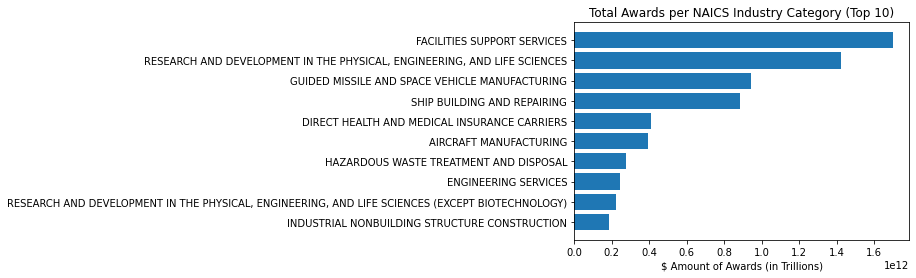

In [6]:
naics_grouped = gov_cont_reduced.groupby('naics_description', as_index = False)['total_dollars_obligated'].sum()
naics_sort = naics_grouped.sort_values(by = ['total_dollars_obligated'], ascending = False)
naics_table = pd.DataFrame(naics_sort)
naics_10 = naics_table.head(10)
naics_10 = naics_10.sort_values(by = ['total_dollars_obligated'], ascending = True)
plt.barh(naics_10['naics_description'],naics_10['total_dollars_obligated'])
plt.title("Total Awards per NAICS Industry Category (Top 10)")
plt.xlabel("$ Amount of Awards (in Trillions)")

Text(0.5, 0, '$ Amount of Awards (in Trillions)')

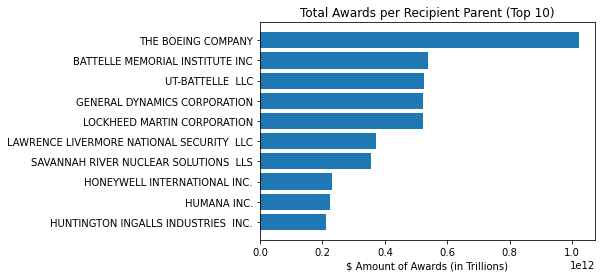

In [7]:
naics_grouped = gov_cont_reduced.groupby('recipient_parent_name', as_index = False)['total_dollars_obligated'].sum()
naics_sort = naics_grouped.sort_values(by = ['total_dollars_obligated'], ascending = False)
naics_table = pd.DataFrame(naics_sort)
naics_10 = naics_table.head(10)
naics_10 = naics_10.sort_values(by = ['total_dollars_obligated'], ascending = True)
plt.barh(naics_10['recipient_parent_name'],naics_10['total_dollars_obligated'])
plt.title("Total Awards per Recipient Parent (Top 10)")
plt.xlabel("$ Amount of Awards (in Trillions)")

10 Largest NAICS Industries

Displayed above is a bar chart of the 10 highest valued NAICS industries measured by the summed dollar value of their total awards. This allows you to visually identify the most lucrative industries and the spread of the data. In this case, the data appears to have a sharp tail which represents a disparity of spending in a couple of industries. 

Text(0.5, 0, 'Average # of Offers')

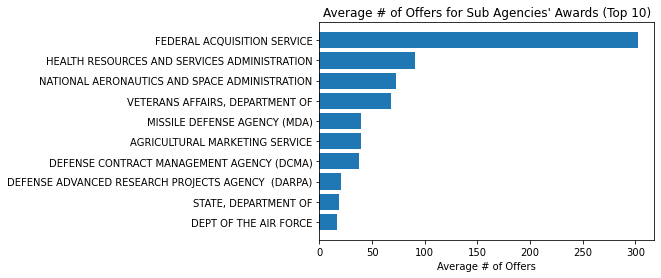

In [8]:
agencies = gov_cont_reduced.groupby('awarding_sub_agency_name', as_index = False)['number_of_offers_received'].mean()
agencies_sort = agencies.sort_values(by = ['number_of_offers_received'], ascending = False)
agencies_table = pd.DataFrame(agencies_sort)
agencies_10 = agencies_table.head(10)
agencies_10 = agencies_10.sort_values(by = ['number_of_offers_received'], ascending = True)
plt.barh(agencies_10['awarding_sub_agency_name'],agencies_10['number_of_offers_received'])
plt.title("Average # of Offers for Sub Agencies' Awards (Top 10)")
plt.xlabel("Average # of Offers")

#### 10 Most Bidded-On Sub-Agencies

The above graph helps scale the competitiveness of contracts for the 10 most bidded on sub agencies. As a sub agency dedicated to procuring goods and services for the government, the Federal Acquisition Service (FAS) at the General Services Administration (GSA) serves a wide array of public sector functions. So, it’s not surprising that they are the most competitive. However, do not mistake competitiveness for business access. Awards for technical products and contracts related to national security are presumed to have a small number of organizations with clearances and access to bid. This would most likely be measured in the “other_than_full_and_open_competition” variable.

Text(0.5, 0, '$ Amount of Awards')

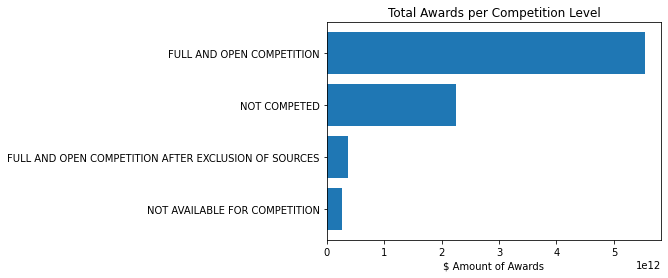

In [9]:
comp_grouped = gov_cont_reduced.groupby('extent_competed', as_index = False)['total_dollars_obligated'].sum()
comp_sort = comp_grouped.sort_values(by = ['total_dollars_obligated'], ascending = False)
comp_table = pd.DataFrame(comp_sort)
comp_4 = comp_table.head(4)
comp_4 = comp_4.sort_values(by = ['total_dollars_obligated'], ascending = True)
plt.barh(comp_4['extent_competed'],comp_4['total_dollars_obligated'])
plt.title("Total Awards per Competition Level")
plt.xlabel("$ Amount of Awards")

In [10]:
firm_grouped = gov_cont_reduced.groupby('recipient_parent_name', as_index = False)['total_dollars_obligated'].sum()
firm_sort = firm_grouped.sort_values(by = ['total_dollars_obligated'], ascending = False)
firm_10 = firm_sort.head(10)
firm_10

,recipient_parent_name,total_dollars_obligated
45176,THE BOEING COMPANY,1.020944e+12
5897,BATTELLE MEMORIAL INSTITUTE INC,5.388893e+11
47635,UT-BATTELLE LLC,5.254688e+11
19084,GENERAL DYNAMICS CORPORATION,5.220575e+11
27776,LOCKHEED MARTIN CORPORATION,5.215099e+11
27019,LAWRENCE LIVERMORE NATIONAL SECURITY LLC,3.706931e+11
40187,SAVANNAH RIVER NUCLEAR SOLUTIONS LLS,3.571580e+11
22074,HONEYWELL INTERNATIONAL INC.,2.309104e+11
22378,HUMANA INC.,2.229932e+11
22424,HUNTINGTON INGALLS INDUSTRIES INC.,2.118037e+11


## Further Research and Analysis

We plan on analyzing more variables and their relationships with the rest of the data more thoroughly. For example, the relationship between cities, NAICS industries, offers received, and price could identify new opportunities where there is a large need (high price) but low supply (quantity of unique recipients and competitiveness). In this case, the openly competed variable would have to be used to account for restricted awards, like for the DOD.


Some data visualizations that may be included, but not limited to are:
* Scatter plot of the number of highly compensated officers and the award price.
* Histogram for award prices for NASA.
* Bar graph ranking the highest paid officers.
* Bar graph on how many closed competitions there are for each recipient.
* Geographical map on the number of recipients in the IT industry for each state.

#### Challenges

Aside from navigating a widely dispersed and abundantly recorded dataset, we plan to set inaugural objectives for Python that will enable further analysis. Such as converting “t/fs” to “1/0s” which would allow for efficient counting and boolean indexing. Also, dealing with Not a Number (NaN) values will be important in order to convert columns to floats to perform calculations.